In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator
import os
import random
from datetime import datetime

In [2]:
input_path= []
label = []

In [3]:
dpath= r"E:\prac\DL\Hexart\LungXRays-grayscale\train"

In [4]:
for cls in os.listdir(dpath):
    print(cls)

Normal
Pneumonia
Tuberculosis


In [5]:
for cls in os.listdir(dpath):
    for p in os.listdir(dpath+"/"+cls):
        if cls == 'Pneumonia':
            label.append('p')
        elif cls == 'Tuberculosis' :
            label.append('t')
        elif cls == 'Normal' :
            label.append('n')
        input_path.append(os.path.join(dpath,cls,p))
print(input_path[0],label[0])

E:\prac\DL\Hexart\LungXRays-grayscale\train\Normal\1.jpg n


In [6]:
print("Total number of images: ",len(input_path))
print(len(label))

Total number of images:  3654
3654


In [7]:
df = pd.DataFrame()
df['images']=input_path
df['label']=label
df=df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,E:\prac\DL\Hexart\LungXRays-grayscale\train\Tu...,t
1,E:\prac\DL\Hexart\LungXRays-grayscale\train\Tu...,t
2,E:\prac\DL\Hexart\LungXRays-grayscale\train\Pn...,p
3,E:\prac\DL\Hexart\LungXRays-grayscale\train\Tu...,t
4,E:\prac\DL\Hexart\LungXRays-grayscale\train\No...,n


<AxesSubplot:xlabel='label', ylabel='count'>

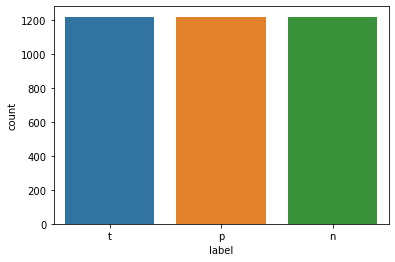

In [8]:
import seaborn as sns
sns.countplot(x=df['label'])

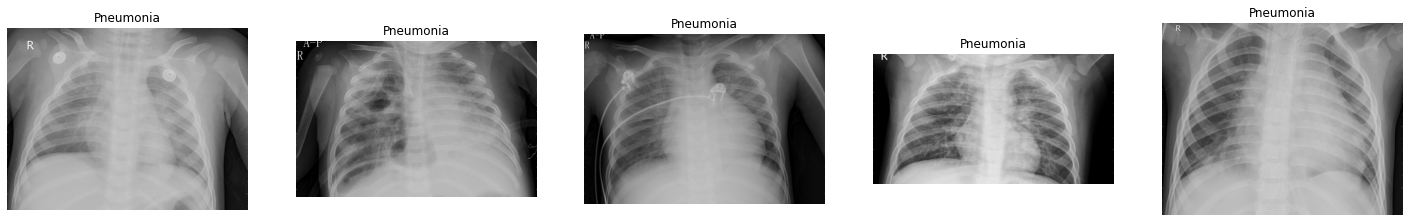

In [9]:
plt.figure(figsize=(25,25))
temp = df[df['label']=='p']['images']
start = random.randint(0,len(temp))
files = temp[start:start+5]

for idx,fil in enumerate(files):
    plt.subplot(5,5,idx+1)
    img = load_img(fil)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Pneumonia')
    plt.axis('off')

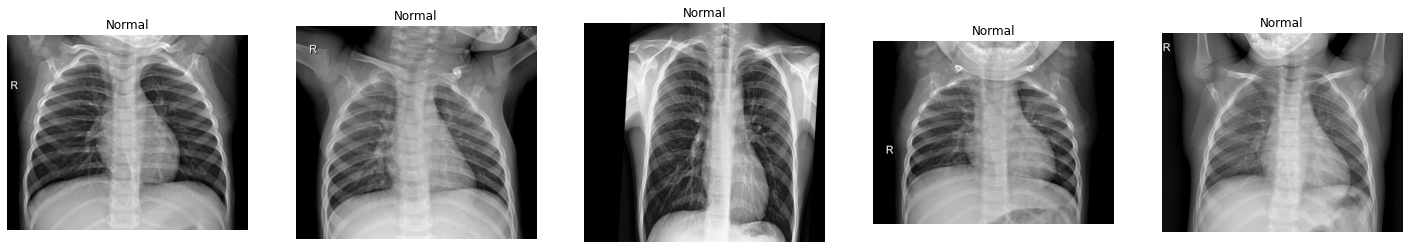

In [10]:
plt.figure(figsize=(25,25))
temp = df[df['label']=='n']['images']
start = random.randint(0,len(temp))
files = temp[start:start+5]

for idx,fil in enumerate(files):
    plt.subplot(5,5,idx+1)
    img = load_img(fil)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Normal')
    plt.axis('off')
    

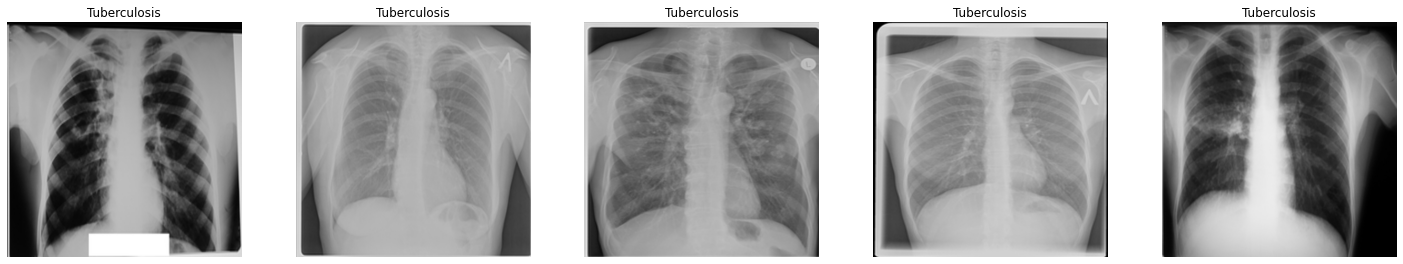

In [11]:
plt.figure(figsize=(25,25))
temp = df[df['label']=='t']['images']
start = random.randint(0,len(temp))
files = temp[start:start+5]

for idx,fil in enumerate(files):
    plt.subplot(5,5,idx+1)
    img = load_img(fil)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Tuberculosis')
    plt.axis('off')
    

# split data

In [12]:
from sklearn.model_selection import train_test_split
train ,test = train_test_split(df, test_size=0.2 , random_state=42)

In [13]:
test.head()

,images,label
1313,E:\prac\DL\Hexart\LungXRays-grayscale\train\Tu...,t
1674,E:\prac\DL\Hexart\LungXRays-grayscale\train\Tu...,t
229,E:\prac\DL\Hexart\LungXRays-grayscale\train\No...,n
3509,E:\prac\DL\Hexart\LungXRays-grayscale\train\Pn...,p
2222,E:\prac\DL\Hexart\LungXRays-grayscale\train\Pn...,p


# data Generator

In [14]:
train_gen = ImageDataGenerator(
    rescale = 1./255, # can also use for test data to normalize
    rotation_range = 40,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_gen = ImageDataGenerator(rescale = 1./255)

train_it = train_gen.flow_from_dataframe(
    train,
    x_col='images',
    y_col='label', 
    target_size=(128,128) ,
    batch_size=128,
    class_mode='categorical'
)

val_it = val_gen.flow_from_dataframe(
    test,
    x_col='images',
    y_col='label', 
    target_size=(128,128) ,
    batch_size=128,
    class_mode='categorical'
)

Found 2923 validated image filenames belonging to 3 classes.
Found 731 validated image filenames belonging to 3 classes.


# Model creation


In [15]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D , Flatten , Dense

In [16]:
model = Sequential([
    Conv2D(16,(3,3), activation = 'relu' , input_shape= (128,128,3)),
    MaxPool2D((2,2)),
    
    Conv2D(32,(3,3), activation = 'relu' ,),
    MaxPool2D((2,2)),
    
    Conv2D(64,(3,3), activation = 'relu' ,),
    MaxPool2D((2,2)),
    
    Flatten(),
    Dense(128 , activation = 'relu'),
    Dense(3 , activation = 'softmax') 
    
])

In [17]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [19]:
t1=datetime.now()
print(t1)

2024-01-25 20:37:47.216478


In [27]:
history= model.fit(train_it, epochs= 5,steps_per_epoch=10 ,validation_data= val_it)

Epoch 1/5
10/10 [==============================] - 35s 4s/step - loss: 1.0280 - accuracy: 0.5854 - val_loss: 0.8969 - val_accuracy: 0.6115
Epoch 2/5
10/10 [==============================] - 34s 4s/step - loss: 0.8218 - accuracy: 0.6648 - val_loss: 0.6979 - val_accuracy: 0.6895
Epoch 3/5
10/10 [==============================] - 32s 3s/step - loss: 0.7525 - accuracy: 0.6805 - val_loss: 0.6459 - val_accuracy: 0.6908
Epoch 4/5
10/10 [==============================] - 34s 3s/step - loss: 0.6471 - accuracy: 0.7430 - val_loss: 0.4759 - val_accuracy: 0.8276
Epoch 5/5
10/10 [==============================] - 32s 3s/step - loss: 0.5906 - accuracy: 0.7695 - val_loss: 0.4037 - val_accuracy: 0.8646


In [28]:
t2=datetime.now()
print(t2-t1)

0:06:52.877673


In [29]:
## validation

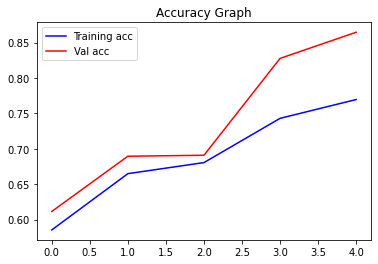

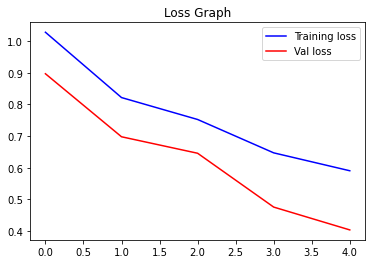

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc , 'b', label='Training acc')
plt.plot(epochs, val_acc , 'r', label='Val acc')
plt.title("Accuracy Graph")
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss , 'b' , label='Training loss')
plt.plot(epochs, val_loss , 'r' , label='Val loss')
plt.title('Loss Graph')
plt.legend()
plt.show()




In [38]:
print("Val_Accuracy\n a",max(history.history['val_accuracy']),"\n b",history.history['val_accuracy'][-1])
print("")
print("Accuracy\n a",max(history.history['accuracy']),"\n b",history.history['accuracy'][-1])
print("")

Val_Accuracy
 a 0.8645690679550171 
 b 0.8645690679550171

Accuracy
 a 0.76953125 
 b 0.76953125

